In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
'''
#Estrategias con 1% de riesgo por trade
strategy = [
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/breakoutger40.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/breakoutgold.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/breakoutusdjpy.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/buyfridaygold.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/openingstrategyus500.csv"
]

strategys = [
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/buyfridaygold100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/dax40breakout100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/goldbreakout100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/us500openingstrategy100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/usdjpybreakout100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100induccionasiaeurusd100.csv"
]

strategys = [
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestTradeQ/backtestusdjpy5.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestTradeQ/dax40backtest5.csv",
    
]
'''

'\n#Estrategias con 1% de riesgo por trade\nstrategy = [\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/breakoutger40.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/breakoutgold.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/breakoutusdjpy.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/buyfridaygold.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/openingstrategyus500.csv"\n]\n\nstrategys = [\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/buyfridaygold100.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/dax40breakout100.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/goldbreakout100.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/us500openingstrategy100.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/usdjpybreakout100.csv",\n    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest

In [3]:
import pandas as pd
import os
import csv

# 1. Tu lista de archivos
strategys = [
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/buyfridaygold100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/dax40breakout100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/goldbreakout100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/us500openingstrategy100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/usdjpybreakout100.csv",
    "C:/Users/juana/OneDrive/Escritorio/EquityBackTest/BackTestRisk100/induccionasiaeurusd100.csv"
]

# 2. Diccionario para guardar tus DataFrames
# Clave = Nombre estrategia, Valor = DataFrame
mis_estrategias = {}

# Función auxiliar para encontrar dónde empiezan los datos (la reutilizamos)
def encontrar_inicio_datos(ruta):
    try:
        with open(ruta, 'r', encoding='utf-16') as f:
            for i, line in enumerate(f):
                if "Hora de apertura" in line or "Open Time" in line:
                    return i
    except:
        # Intento con utf-8 si falla utf-16
        with open(ruta, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                if "Hora de apertura" in line or "Open Time" in line:
                    return i
    return 0

# 3. Bucle para procesar cada archivo
for archivo in strategys:
    # Obtener el nombre limpio del archivo (ej: "breakoutger40")
    nombre_estrategia = os.path.basename(archivo).replace('.csv', '')
    
    print(f"Procesando: {nombre_estrategia}...")
    
    # Encontrar fila de encabezado
    fila_header = encontrar_inicio_datos(archivo)
    
    try:
        # Leer con Pandas (usando la lógica de limpieza)
        df = pd.read_csv(archivo, 
                         skiprows=fila_header, 
                         encoding='utf-16', 
                         sep='\t') # O sep=None engine='python'
        
        # Limpieza básica
        df = df.dropna(axis=1, how='all')
        
        # GUARDAR EN EL DICCIONARIO
        mis_estrategias[nombre_estrategia] = df
        
    except Exception as e:
        print(f"Error leyendo {nombre_estrategia}: {e}")

print("\n¡Carga completa! Tienes las siguientes estrategias disponibles:")
print(mis_estrategias.keys())



Procesando: buyfridaygold100...
Procesando: dax40breakout100...
Procesando: goldbreakout100...
Procesando: us500openingstrategy100...
Procesando: usdjpybreakout100...
Procesando: induccionasiaeurusd100...

¡Carga completa! Tienes las siguientes estrategias disponibles:
dict_keys(['buyfridaygold100', 'dax40breakout100', 'goldbreakout100', 'us500openingstrategy100', 'usdjpybreakout100', 'induccionasiaeurusd100'])


Generando gráfico interactivo de Rendimiento y Drawdown...


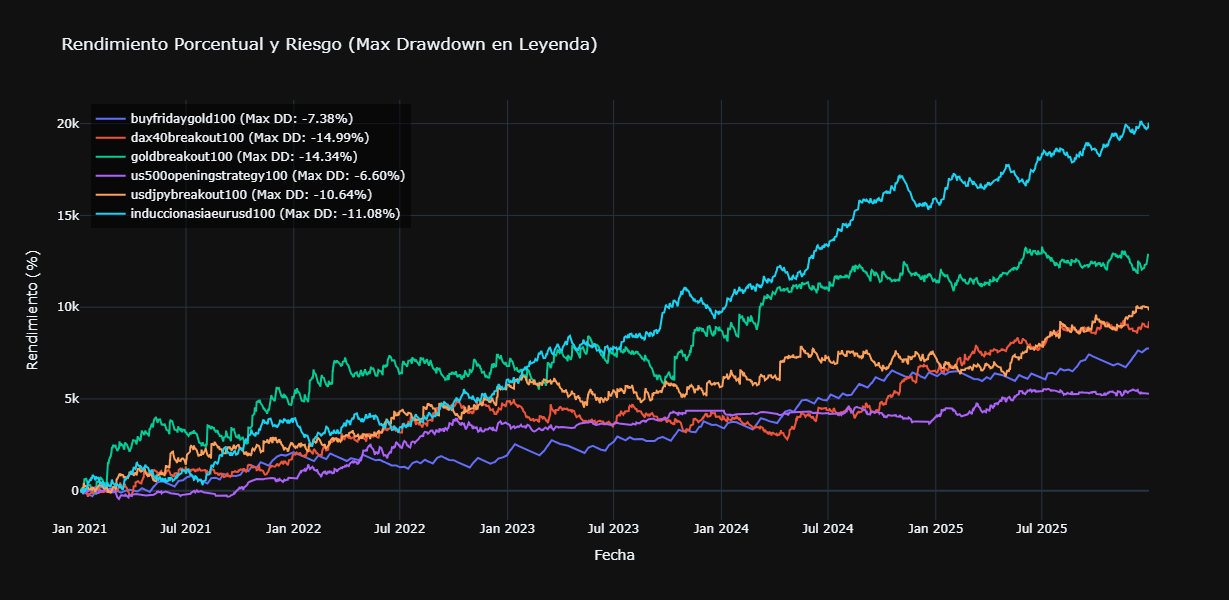

In [4]:
import plotly.graph_objects as go

# Creamos la figura interactiva vacía
fig = go.Figure()

print("Generando gráfico interactivo de Rendimiento y Drawdown...")

for nombre, df in mis_estrategias.items():
    # 1. Copia de seguridad
    data = df.copy()

    # 2. Convertir fecha (Usando tus columnas)
    data['<DATE>'] = pd.to_datetime(data['<DATE>'])
    
    # 3. Ordenar cronológicamente
    data = data.sort_values('<DATE>')
    
    # 4. Limpieza de Balance (Tu código corregido)
    if data['<BALANCE>'].dtype == 'O': 
        data['<BALANCE>'] = data['<BALANCE>'].astype(str).str.replace(' ', '').astype(float)
    
    # --- CÁLCULO DEL MAX DRAWDOWN ---
    # a. Calculamos el máximo histórico del balance hasta la fecha actual (Running Max)
    data['Peak_Balance'] = data['<BALANCE>'].cummax()
    
    # b. Calculamos el Drawdown porcentual en cada punto: (Balance - Pico) / Pico
    # Esto nos dará valores negativos (ej: -5.00 para una caída del 5%)
    data['Drawdown_Pct'] = ((data['<BALANCE>'] - data['Peak_Balance']) / data['Peak_Balance']) * 100
    
    # c. Obtenemos el PEOR Drawdown de toda la historia (el valor mínimo)
    max_dd = data['Drawdown_Pct'].min()

    # --- CÁLCULO DEL RENDIMIENTO PORCENTUAL ---
    balance_inicial = data['<BALANCE>'].iloc[0]
    
    if balance_inicial != 0:
        data['Performance_Pct'] = ((data['<BALANCE>'] / balance_inicial) - 1) * 10000
    else:
        data['Performance_Pct'] = 0

    # 5. Agregar la traza (línea) a la figura de Plotly
    # AÑADIMOS EL MAX DD AL NOMBRE DE LA LEYENDA
    etiqueta_leyenda = f"{nombre} (Max DD: {max_dd:.2f}%)"
    
    fig.add_trace(go.Scatter(
        x=data['<DATE>'],
        y=data['Performance_Pct'],
        mode='lines',
        name=etiqueta_leyenda,
        # Pasamos el drawdown como 'customdata' para mostrarlo en el tooltip
        customdata=data['Drawdown_Pct'],
        hovertemplate=(
            '<b>%{y:.2f}% Rendimiento</b><br>' +
            'Drawdown Actual: %{customdata:.2f}%<br>' +
            'Fecha: %{x|%Y-%m-%d}'
        )
    ))

# --- DISEÑO Y ESTÉTICA INTERACTIVA ---
fig.update_layout(
    title='Rendimiento Porcentual y Riesgo (Max Drawdown en Leyenda)',
    xaxis_title='Fecha',
    yaxis_title='Rendimiento (%)',
    template='plotly_dark', # Tema oscuro profesional
    hovermode="x unified",  # Muestra todas las etiquetas al mismo tiempo al pasar el mouse
    
    # --- TAMAÑO DE LA GRÁFICA ---
    width=1000,  
    height=600, 
    
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(0,0,0,0.5)" # Fondo semitransparente para leer mejor
    )
)

# Mostrar gráfico
fig.show()

Generando simulación de PORTAFOLIO UNIFICADO...
Fusionando operaciones y calculando curva combinada...


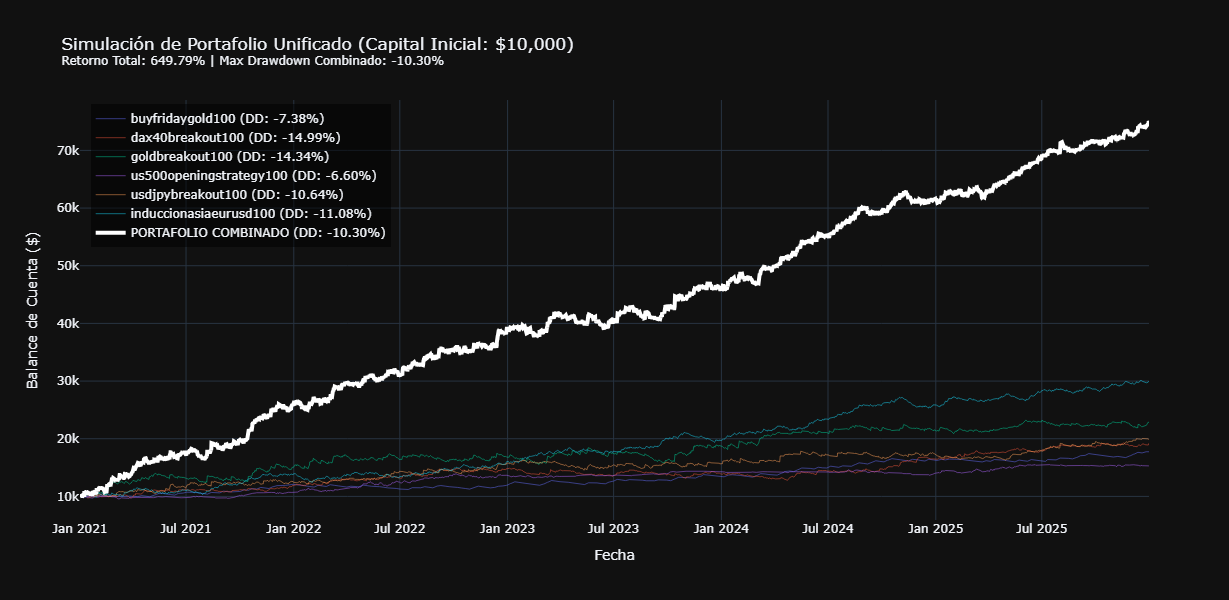

In [6]:
import plotly.graph_objects as go

# Creamos la figura interactiva vacía
fig = go.Figure()

print("Generando simulación de PORTAFOLIO UNIFICADO...")

# Lista para acumular TODAS las operaciones individuales de todas las estrategias
todas_las_operaciones = []

# --- 1. PROCESAMIENTO INDIVIDUAL Y EXTRACCIÓN DE TRADES ---
for nombre, df in mis_estrategias.items():
    # Copia y limpieza básica
    data = df.copy()
    data['<DATE>'] = pd.to_datetime(data['<DATE>'])
    data = data.sort_values('<DATE>')
    
    # Limpieza de Balance
    if data['<BALANCE>'].dtype == 'O': 
        data['<BALANCE>'] = data['<BALANCE>'].astype(str).str.replace(' ', '').astype(float)
    
    # --- INGENIERÍA INVERSA: OBTENER EL PROFIT POR TRADE ---
    # Asumimos que cada backtest empezó con 10,000. 
    # El 'Profit' de cada trade es la diferencia entre el balance actual y el anterior.
    # Para la primera fila, el profit es (Balance - 10000).
    data['Trade_Profit'] = data['<BALANCE>'].diff()
    data.iloc[0, data.columns.get_loc('Trade_Profit')] = data.iloc[0]['<BALANCE>'] - 10000
    
    # Guardamos estas operaciones para el portafolio general
    temp_df = data[['<DATE>', 'Trade_Profit']].copy()
    temp_df['Estrategia'] = nombre # Etiquetamos de dónde vino
    todas_las_operaciones.append(temp_df)

    # --- CÁLCULO PARA LA LÍNEA INDIVIDUAL (Solo visualización) ---
    # Calculamos rendimiento porcentual individual para contexto
    balance_inicial = 100 # Forzamos la base de 10k que mencionaste
    data['Performance_Pct'] = ((data['<BALANCE>'] - balance_inicial) / balance_inicial) * 100
    
    # Max Drawdown Individual
    peak = data['<BALANCE>'].cummax()
    dd_pct = ((data['<BALANCE>'] - peak) / peak) * 100
    max_dd = dd_pct.min()

    # Graficamos la línea individual (más delgada y con transparencia)
    fig.add_trace(go.Scatter(
        x=data['<DATE>'],
        y=data['<BALANCE>'], # Graficamos DINERO, no porcentaje, para ver la simulación real
        mode='lines',
        name=f"{nombre} (DD: {max_dd:.2f}%)",
        opacity=0.5, # Un poco transparente para dar protagonismo al portafolio
        line=dict(width=1)
    ))

# --- 2. CONSTRUCCIÓN DEL PORTAFOLIO UNIFICADO ---
print("Fusionando operaciones y calculando curva combinada...")

# Unimos todas las listas en un solo DataFrame
df_portfolio = pd.concat(todas_las_operaciones)

# ORDENAMOS CRONOLÓGICAMENTE (Crucial para la simulación)
df_portfolio = df_portfolio.sort_values('<DATE>')

# --- SIMULACIÓN DE LA CUENTA ---
capital_inicial_portfolio = 10000

# La curva de equidad es el Capital Inicial + Suma Acumulada de todos los profits
df_portfolio['Equity_Portfolio'] = capital_inicial_portfolio + df_portfolio['Trade_Profit'].cumsum()

# --- CÁLCULO DE MÉTRICAS DEL PORTAFOLIO ---
# a. Max Drawdown del Portafolio
peak_port = df_portfolio['Equity_Portfolio'].cummax()
dd_port_series = ((df_portfolio['Equity_Portfolio'] - peak_port) / peak_port) * 100
max_dd_portfolio = dd_port_series.min()

# b. Retorno Total
retorno_total = df_portfolio['Equity_Portfolio'].iloc[-1] - capital_inicial_portfolio
retorno_pct = (retorno_total / capital_inicial_portfolio) * 100

# --- 3. GRAFICAR EL PORTAFOLIO MASTER ---
fig.add_trace(go.Scatter(
    x=df_portfolio['<DATE>'],
    y=df_portfolio['Equity_Portfolio'],
    mode='lines',
    name=f"PORTAFOLIO COMBINADO (DD: {max_dd_portfolio:.2f}%)",
    line=dict(color='white', width=4), # Línea blanca, gruesa y sólida
    customdata=dd_port_series,
    hovertemplate=(
        '<b>$ %{y:,.2f} Balance</b><br>' +
        'Drawdown: %{customdata:.2f}%<br>' +
        'Estrategia origen: %{text}<br>' + # Sería ideal pasar el nombre de la estrategia en text si se pudiera mapear fácil
        'Fecha: %{x|%Y-%m-%d}'
    )
))

# --- DISEÑO Y ESTÉTICA ---
fig.update_layout(
    title=f'Simulación de Portafolio Unificado (Capital Inicial: ${capital_inicial_portfolio:,.0f})<br><sup>Retorno Total: {retorno_pct:.2f}% | Max Drawdown Combinado: {max_dd_portfolio:.2f}%</sup>',
    xaxis_title='Fecha',
    yaxis_title='Balance de Cuenta ($)',
    template='plotly_dark',
    hovermode="x unified",
    width=1000,  
    height=600, 
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(0,0,0,0.5)"
    )
)

fig.show()

## Creacion de matriz de correlacion de los retornos de cada una de las estrategias

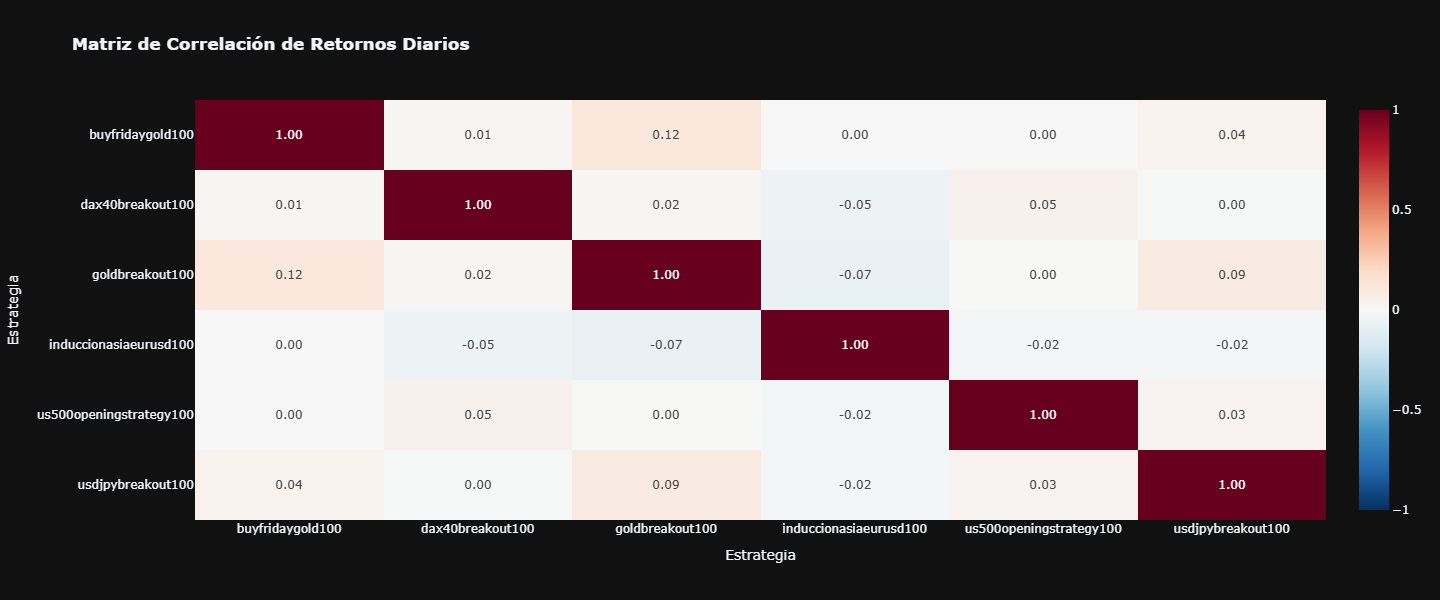

In [9]:
import plotly.express as px

# A. Preparar datos: Alinear beneficios por DÍA
# Usamos el DataFrame 'df_portfolio' que ya creamos antes
df_corr = df_portfolio.copy()
df_corr['Fecha_Dia'] = df_corr['<DATE>'].dt.date # Quitamos la hora para agrupar por día

# Pivot Table: Columnas=Estrategias, Filas=Días, Valores=Suma de Beneficio Diario
# fillna(0) es importante: si una estrategia no operó ese día, su retorno es 0
matriz_diaria = df_corr.pivot_table(index='Fecha_Dia', columns='Estrategia', values='Trade_Profit', aggfunc='sum').fillna(0)

# B. Calcular Correlación de Pearson
# Esto nos dice qué tan similares son los resultados diarios entre estrategias
correlacion = matriz_diaria.corr(method='pearson')

# C. Graficar Heatmap con Plotly Express
fig_corr = px.imshow(
    correlacion,
    text_auto='.2f', # Muestra el número con 2 decimales
    aspect="auto",
    color_continuous_scale='RdBu_r', # Rojo=Positivo(Malo), Azul=Negativo(Bueno)
    zmin=-1, zmax=1,
    title="<b>Matriz de Correlación de Retornos Diarios</b><br></sup>"
)

fig_corr.update_layout(
    width=700,
    height=600,
    template='plotly_dark'
)

fig_corr.show()